In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score



In [ ]:
# Importing the dataset 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

PREPROCESSING & VISUALIZATION


In [ ]:
#display dataframe
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# checking for missing values (no null values)
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
# Checking for NA values (no NA values)
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
# summary statistics
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
# checking correlation matrix
df.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


Text(0.5, 1.0, 'Pairplot of Attributes in Fire Damage Dataframe')

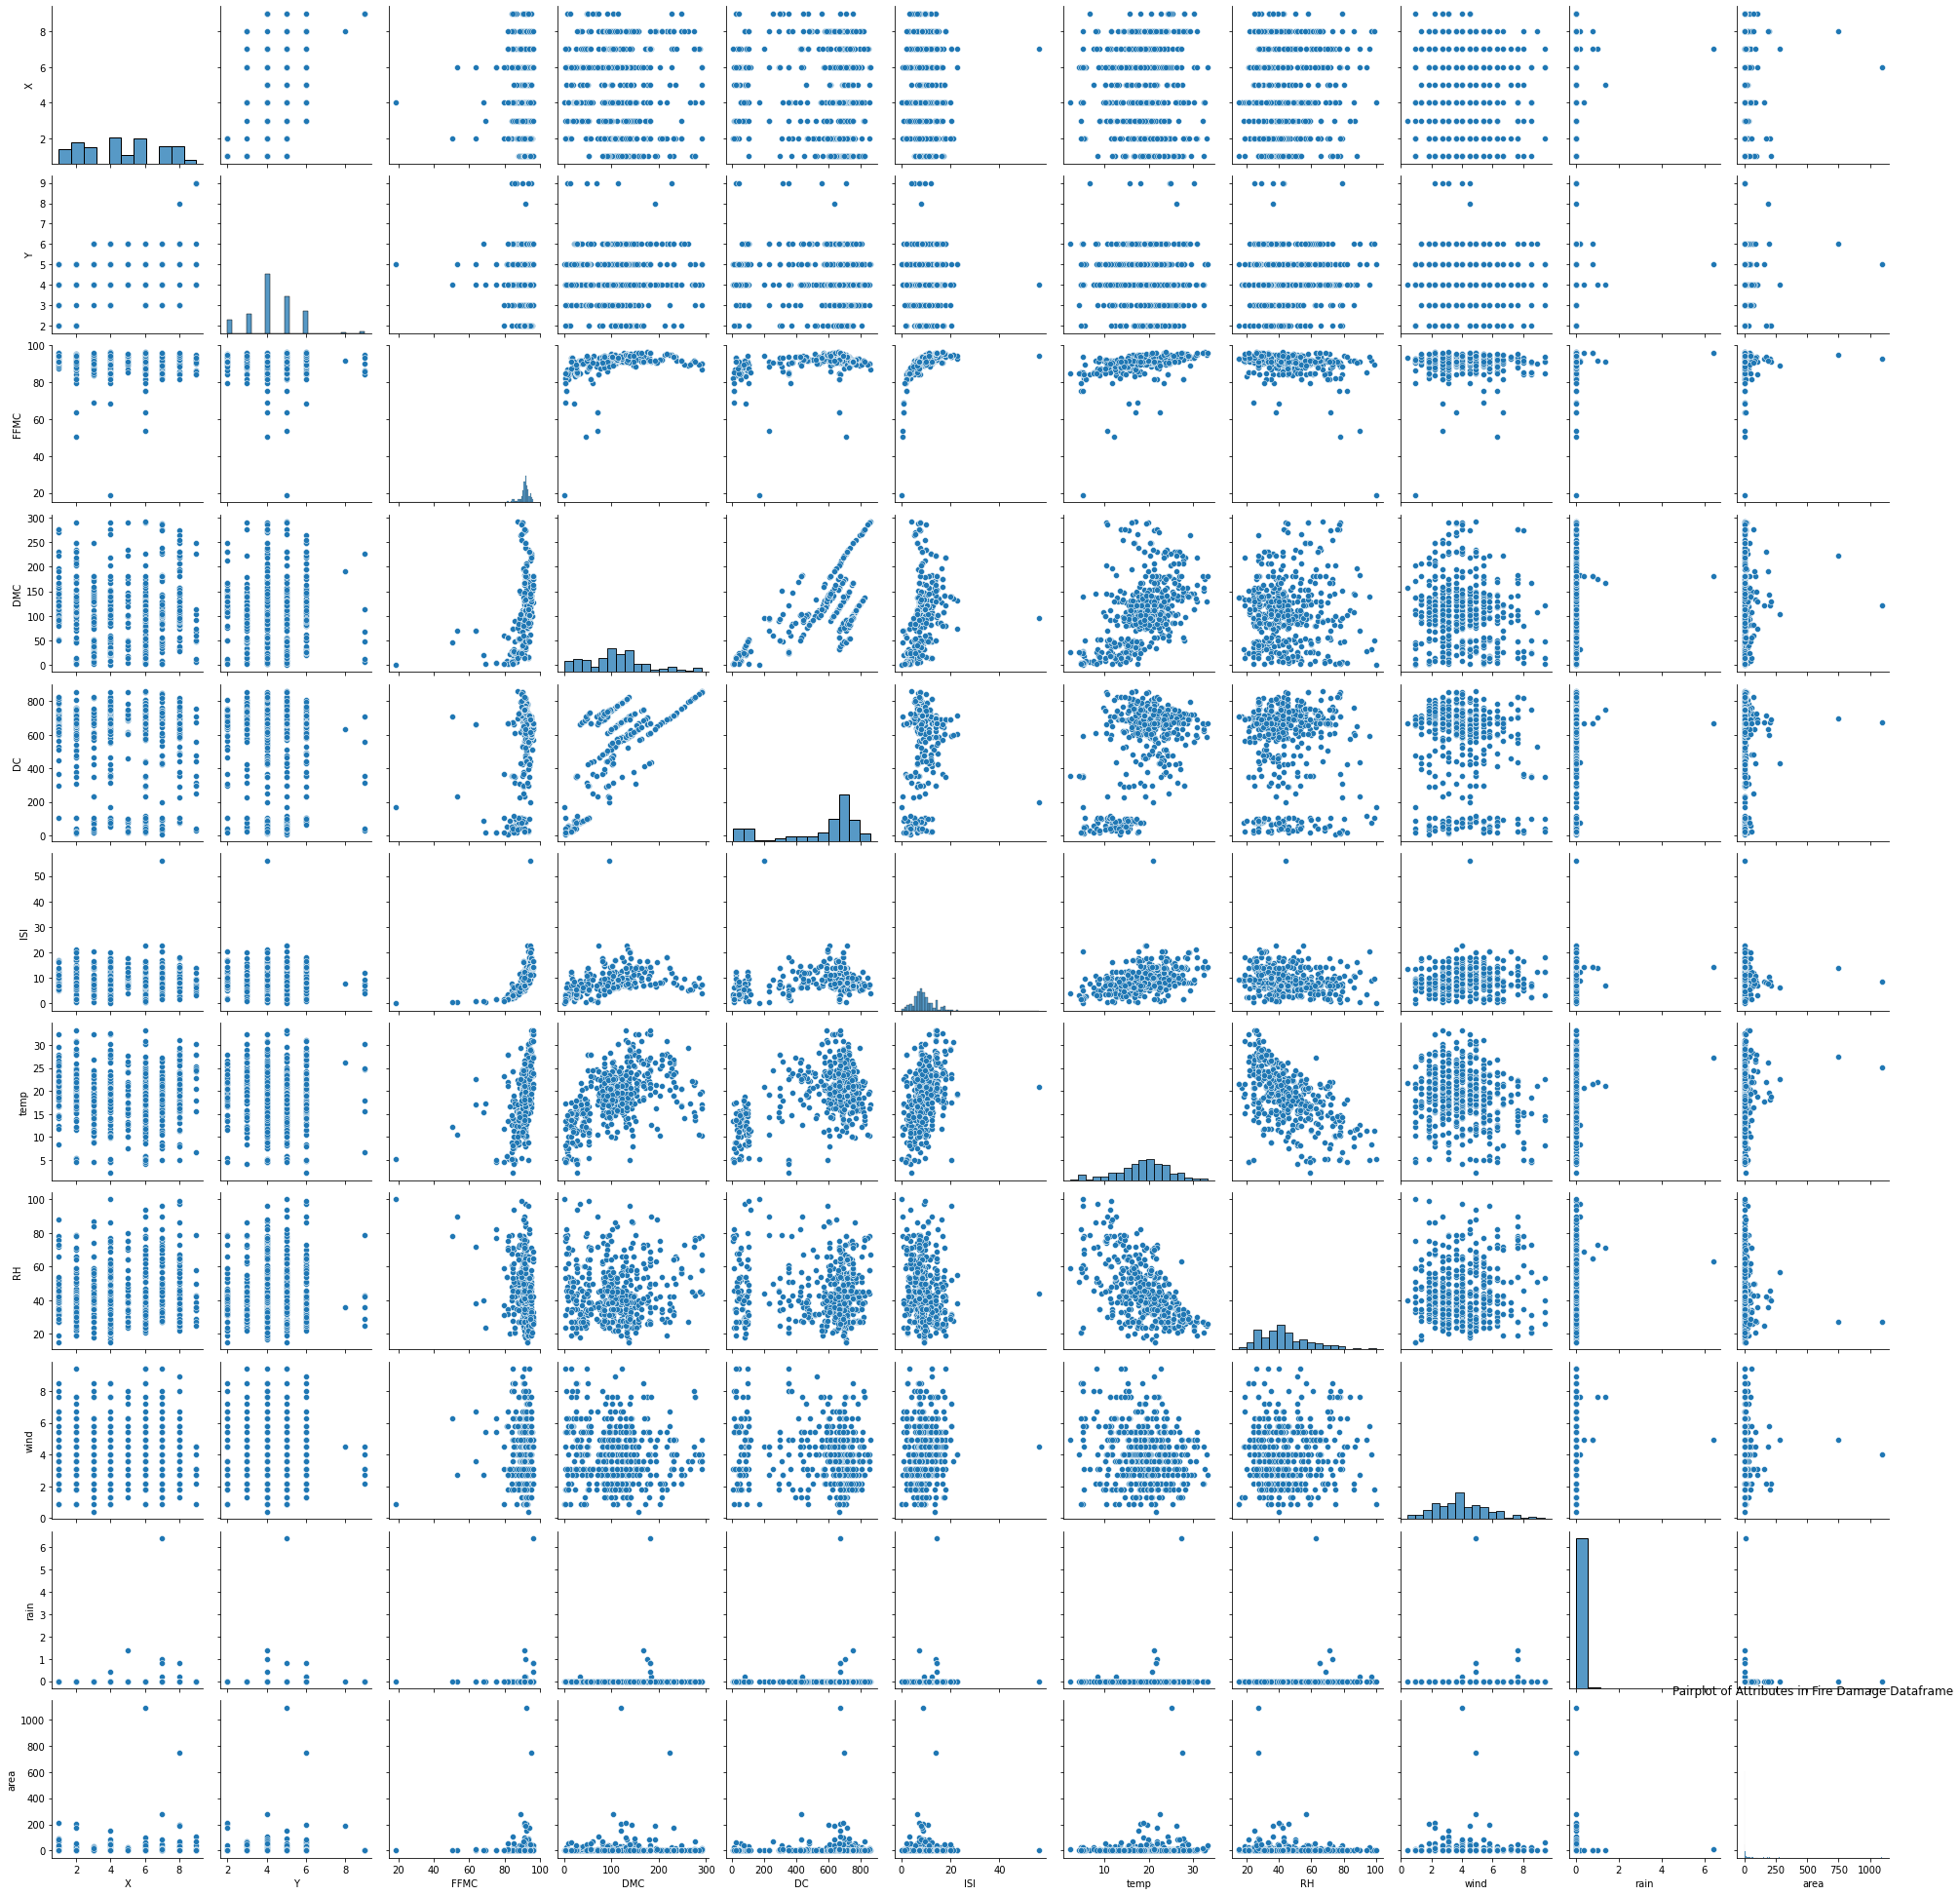

In [ ]:
sns.pairplot(df)
plt.title('Pairplot of Attributes in Fire Damage Dataframe')

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

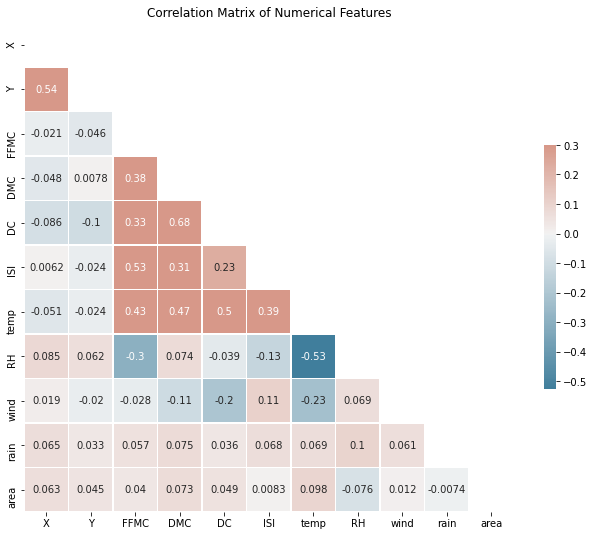

In [ ]:
# Correlation Matrix looking at correlation between attributes
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix of Numerical Features')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density Plot for Area')

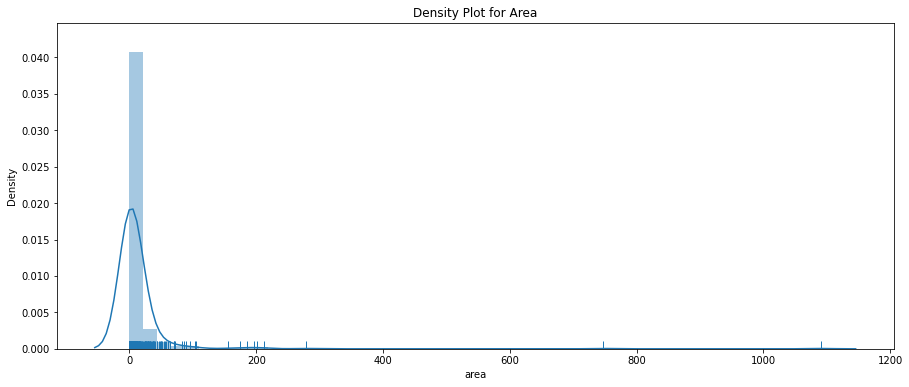

In [ ]:
# Exploring the target variable 'area'
plt.figure(figsize=(15,6))
sns.distplot(df['area'], kde = True, rug = True)
plt.title('Density Plot for Area')

In [ ]:
# conducting a univariate analysis for skew and kurtosis values to look at the distribution of the target variable 
print(df['area'].skew())
print(df['area'].kurtosis())

12.846933533934868
194.1407210942299


Text(0.5, 1.0, 'Boxplot for Area')

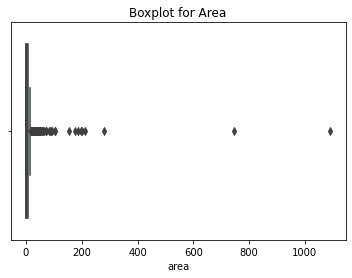

In [ ]:
# looking into outliers for the target variable 
sns.boxplot(x = 'area', data = df)
plt.title("Boxplot for Area")

Text(0.5, 1.0, 'Boxplot for Area by Month')

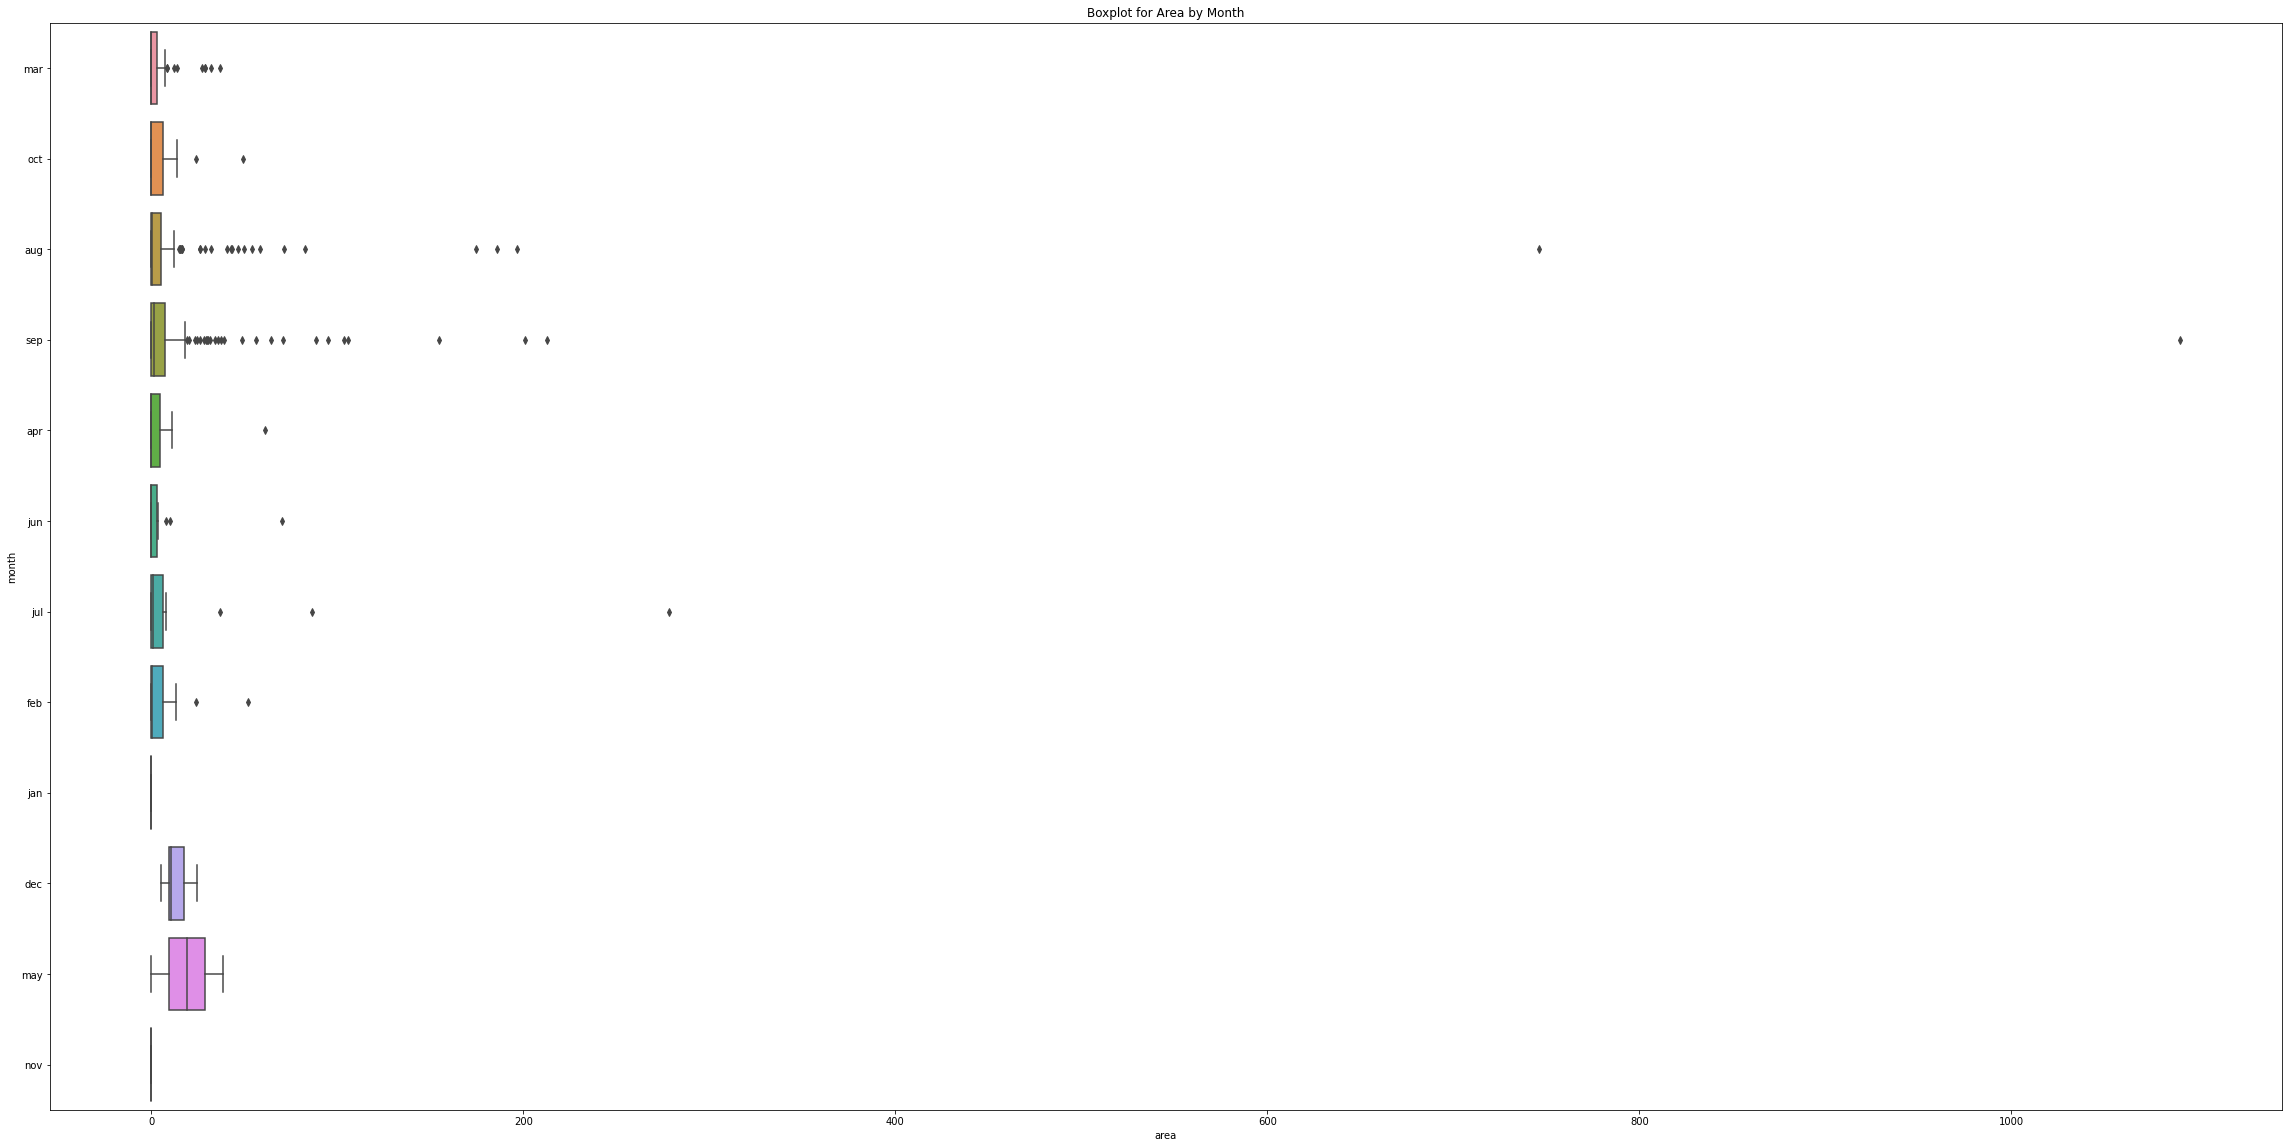

In [ ]:
plt.figure(figsize=(40,20))

sns.boxplot(x=df['area'], y=df['month'], orient="h")
plt.title("Boxplot for Area by Month")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Fires by Month')

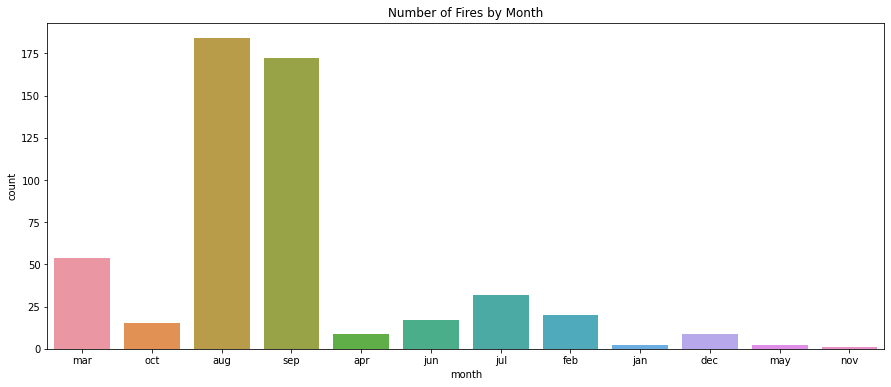

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['month'])
plt.title("Number of Fires by Month")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Fires by Day')

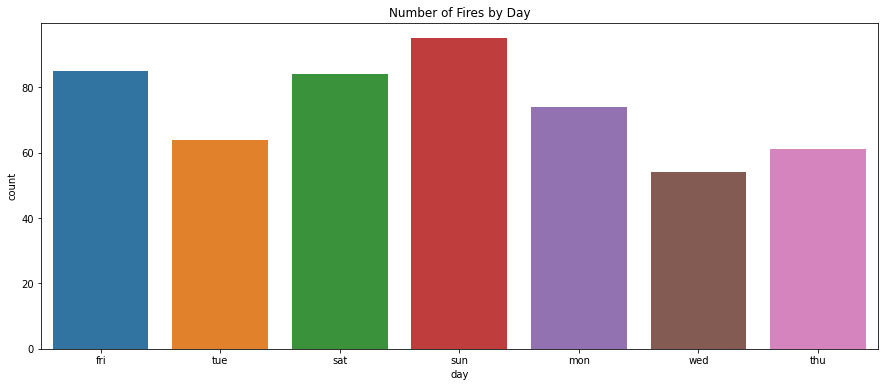

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df['day'])
plt.title("Number of Fires by Day")

In [ ]:
# grouping average area of forest fires by month (may, july, sep were highest, and jan, nov, mar were lowest)
df.groupby('month').mean()['area']

month
apr     8.891111
aug    12.489076
dec    13.330000
feb     6.275000
jan     0.000000
jul    14.369687
jun     5.841176
mar     4.356667
may    19.240000
nov     0.000000
oct     6.638000
sep    17.942616
Name: area, dtype: float64

In [ ]:
# grouping average area of forest fires by day (sat was highest)
df.groupby('day').mean()['area']

day
fri     5.261647
mon     9.547703
sat    25.534048
sun    10.104526
thu    16.345902
tue    12.621719
wed    10.714815
Name: area, dtype: float64

In [ ]:
# looking at max area burnt by month 
df.groupby('month').max()['area']

month
apr      61.13
aug     746.28
dec      24.77
feb      51.78
jan       0.00
jul     278.53
jun      70.32
mar      36.85
may      38.48
nov       0.00
oct      49.37
sep    1090.84
Name: area, dtype: float64

In [ ]:
# looking at max area burnt by day (max was sat in line with avg)
df.groupby('day').max()['area']

day
fri      43.32
mon     278.53
sat    1090.84
sun     196.48
thu     746.28
tue     212.88
wed     185.76
Name: area, dtype: float64

**Section 2: Transformations**

In [ ]:
# converting day and month column to numerical values
daymap = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}
df['day'] = df['day'].map(daymap)

monthmap = {'jan': 0, 'feb': 1, 'mar': 2,'apr': 3,'may': 4,'jun':5,'jul': 6,'aug': 7,'sep': 8,'oct': 9,'nov': 10,'dec': 11}
df['month'] = df['month'].map(monthmap)


In [ ]:
# converting days and months to cyclical values
import math

df["month_norm"] = 2 * math.pi * df["month"] / df["month"].max()

df["month_cos"] = np.cos(df["month_norm"])
df["month_sin"] = np.sin(df["month_norm"])

df["day_norm"] = 2 * math.pi * df["day"] / df["day"].max()

df["day_cos"] = np.cos(df["day_norm"])
df["day_sin"] = np.sin(df["day_norm"])

del df['month_norm']
del df['day_norm']
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_cos,month_sin,day_cos,day_sin
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.415415,0.909632,-0.5,-8.660254e-01
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.415415,-0.909632,0.5,8.660254e-01
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.415415,-0.909632,0.5,-8.660254e-01
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.415415,0.909632,-0.5,-8.660254e-01
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.415415,0.909632,1.0,-2.449294e-16


In [ ]:
#Duplicate dataset
df2 = df.copy()
df3 = df.copy()

In [ ]:
#discretize the continuous variable
df2['area_bins'] = pd.cut(df2['area'], bins=[0,5, 10, 50, 100, 1100], include_lowest=True, 
                                 labels=['0-5', '5-10', '10-50', '50-100', '>100'])
df2.area_bins.value_counts()

0-5       366
10-50      71
5-10       56
50-100     13
>100       11
Name: area_bins, dtype: int64

Text(0.5, 1.0, 'Barplot Comparing Area Bins ')

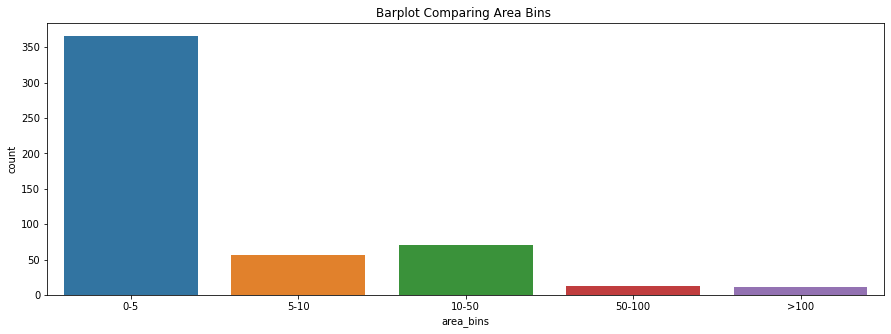

In [ ]:
# barplot comparing area bins
plt.figure(figsize=(15,5))
sns.countplot(data=df2, x="area_bins")
plt.title("Barplot Comparing Area Bins ")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72f0233d50>,
      dtype=object)

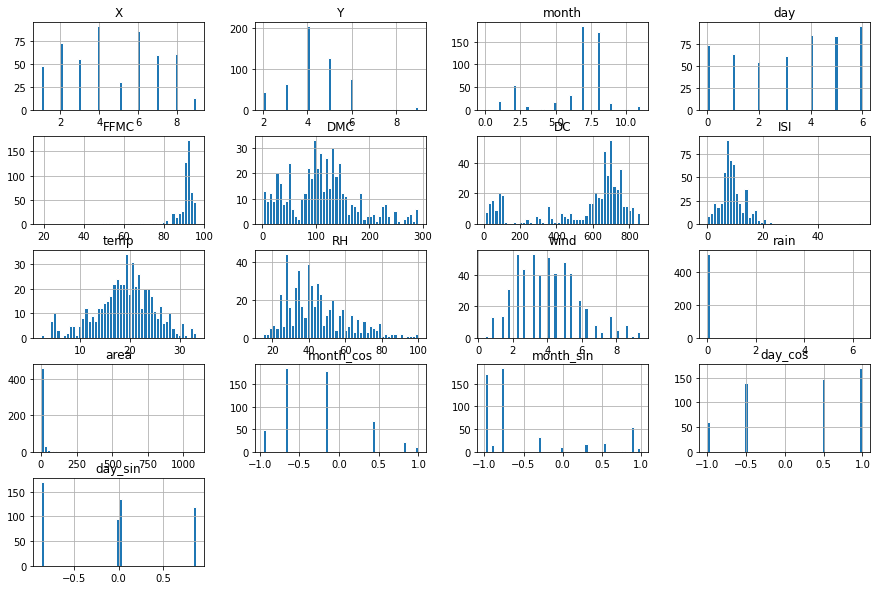

In [ ]:
# histogram plots for features
df2.hist(bins=50, figsize=(15,10), ec='w',)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts of Months')

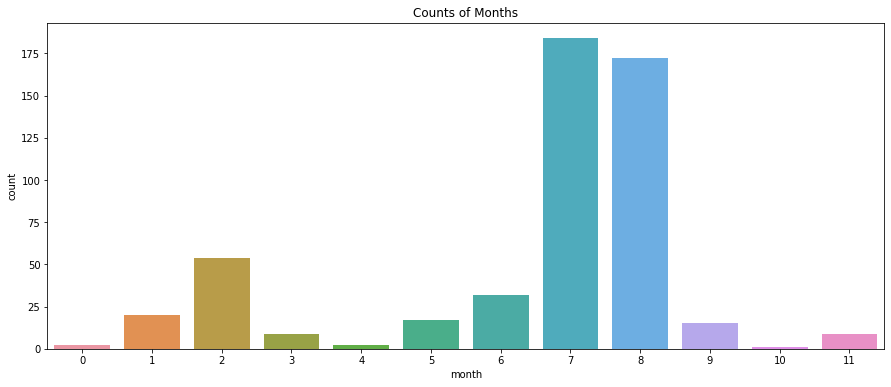

In [ ]:
#countplot for months
plt.figure(figsize=(15,6))
sns.countplot(df['month'])
plt.title('Counts of Months')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts of Days')

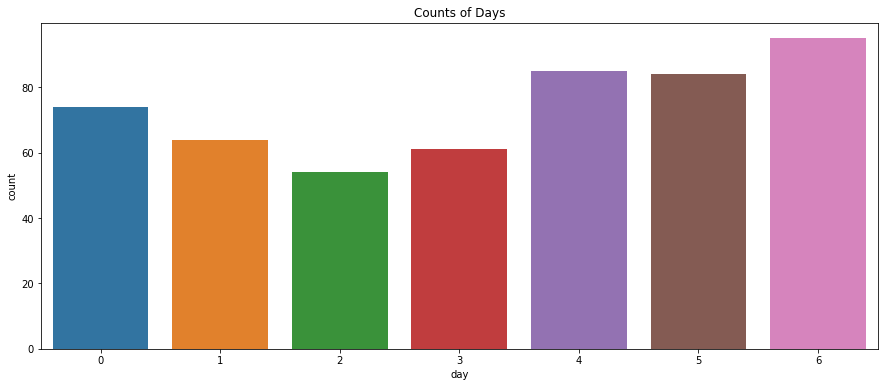

In [ ]:
#countplot for days
plt.figure(figsize=(15,6))
sns.countplot(df['day'])
plt.title('Counts of Days')

In [ ]:
#Oulier Detection

In [ ]:
#copy dataframe to run outlier detection
dfo = df.copy()


In [ ]:
for col in ['month', 'day']:
    dfo[col] = pd.Categorical(dfo[col])
    dfo[col] = dfo[col].cat.codes

#specify the 12 metrics column names to be modelled
model_columns=dfo.columns[:13]


In [ ]:
#import library for isolation forests
from sklearn.ensemble import IsolationForest

clf=IsolationForest(contamination = 0.1)
clf.fit(dfo[model_columns])
pred = clf.predict(dfo[model_columns])
dfo['anomaly_isolation_forest']=pred
outliers=df.loc[dfo['anomaly_isolation_forest']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dfo['anomaly_isolation_forest'].value_counts())


 1    465
-1     52
Name: anomaly_isolation_forest, dtype: int64


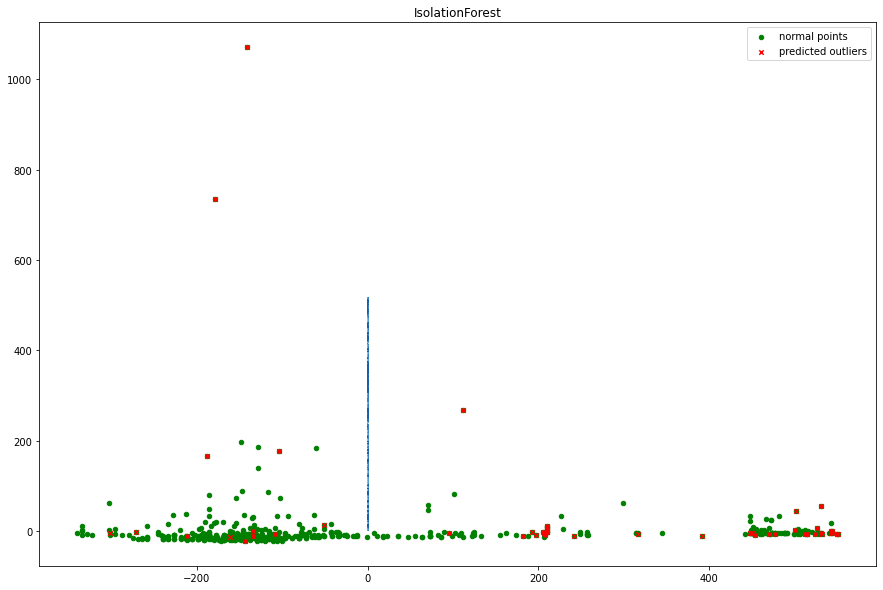

In [ ]:
# plotting outliers in 2d

plt.figure(figsize=(15,10))
#import PCA library to reduce dimensions
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(dfo[model_columns])
res=pd.DataFrame(pca.transform(dfo[model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',s=20, marker="x", label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

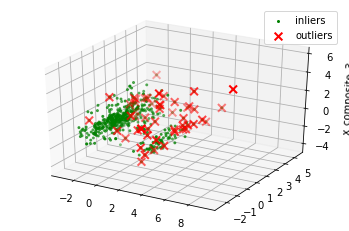

In [ ]:
# plotting outliers in 3d
#import libraries
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dfo[model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [ ]:
#outlier method 2-Elliptical Envelope 
from sklearn.covariance import EllipticEnvelope
eclf=EllipticEnvelope(contamination=.1)
eclf.fit(dfo)
pred = eclf.predict(dfo)
dfo['anomaly_elliptic']=pred
outliers=dfo.loc[dfo['anomaly_elliptic']==-1]
outlier_index1=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(dfo['anomaly_elliptic'].value_counts())
print(dfo.head())

 1    465
-1     52
Name: anomaly_elliptic, dtype: int64
   X  Y  month  ...       day_sin  anomaly_isolation_forest  anomaly_elliptic
0  7  5      2  ... -8.660254e-01                         1                 1
1  7  4      9  ...  8.660254e-01                         1                 1
2  7  4      9  ... -8.660254e-01                         1                 1
3  8  6      2  ... -8.660254e-01                        -1                 1
4  8  6      2  ... -2.449294e-16                        -1                 1

[5 rows x 19 columns]


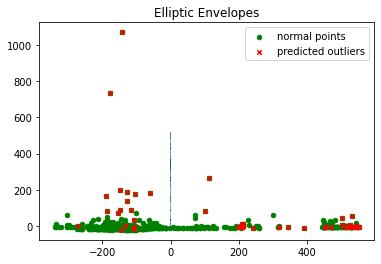

In [ ]:
pca = PCA(2)
pca.fit(dfo[model_columns])
res=pd.DataFrame(pca.transform(dfo[model_columns]))
Z = np.array(res)
plt.title("Elliptic Envelopes")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index1,0],res.iloc[outlier_index1,1], c='red',s=20,  marker="x",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

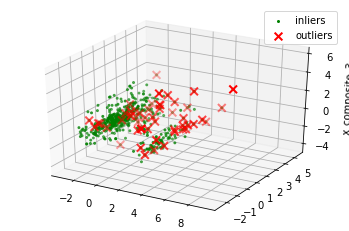

In [ ]:

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dfo[model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index1,0],X_reduce[outlier_index1,1], X_reduce[outlier_index1,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [ ]:
# create a list of our conditions
conditions = [
    (dfo['anomaly_isolation_forest'] == -1) & (dfo['anomaly_elliptic'] == -1),
    (dfo['anomaly_isolation_forest'] == 1) & (dfo['anomaly_elliptic'] == 1),
    (dfo['anomaly_isolation_forest'] == -1) & (dfo['anomaly_elliptic'] == 1),
    (dfo['anomaly_isolation_forest'] == 1) & (dfo['anomaly_elliptic'] == -1)
    ]

# create a list of the values we want to assign for each condition
values = [-1, 1, 1, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
dfo['outlier'] = np.select(conditions, values)

print(dfo['outlier'].value_counts())

del dfo['anomaly_isolation_forest']
del dfo['anomaly_elliptic']

print(dfo.head())

 1    478
-1     39
Name: outlier, dtype: int64
   X  Y  month  day  FFMC  ...  month_cos  month_sin  day_cos       day_sin  outlier
0  7  5      2    4  86.2  ...   0.415415   0.909632     -0.5 -8.660254e-01        1
1  7  4      9    1  90.6  ...   0.415415  -0.909632      0.5  8.660254e-01        1
2  7  4      9    5  90.6  ...   0.415415  -0.909632      0.5 -8.660254e-01        1
3  8  6      2    4  91.7  ...   0.415415   0.909632     -0.5 -8.660254e-01        1
4  8  6      2    6  89.3  ...   0.415415   0.909632      1.0 -2.449294e-16        1

[5 rows x 18 columns]


In [ ]:
#process for classification

In [ ]:
# converting day and month column to numerical values
area_class = {'0-5': 0, '10-50': 1, '5-10': 2, '50-100': 3, '>100': 4}
df2['area_bins'] = df2['area_bins'].map(area_class)

In [ ]:
# x,y for classifcation
X=df2.drop(["area_bins", "month", "day","area"] ,axis=1)
y=df2.area_bins

In [ ]:
#x,y for regression
Xl = df.drop(["month", "day","area"], axis=1)
yl = df.area

In [ ]:
#split for regression

X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size = 0.30)

In [ ]:
#split for classification
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X, y, test_size = 0.30)

**Statistical analysis for linear regression**


In [ ]:
#import libraries for statistical tests
import statsmodels.api as sm
from scipy.stats import zscore


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Regression after conducting log transformations
#columns that contain outliers
out_columns = ['area','FFMC','ISI','rain']
#describe the outlier columns
print(df3[out_columns].describe())

              area        FFMC         ISI        rain
count   517.000000  517.000000  517.000000  517.000000
mean     12.847292   90.644681    9.021663    0.021663
std      63.655818    5.520111    4.559477    0.295959
min       0.000000   18.700000    0.000000    0.000000
25%       0.000000   90.200000    6.500000    0.000000
50%       0.520000   91.600000    8.400000    0.000000
75%       6.570000   92.900000   10.800000    0.000000
max    1090.840000   96.200000   56.100000    6.400000


In [ ]:
#applying log transformations
np.log1p(df3[out_columns]).skew(), np.log1p(df3[out_columns]).kurtosis()

(area     1.217838
 FFMC   -11.675394
 ISI     -0.937218
 rain    14.173028
 dtype: float64, area      0.945668
 FFMC    185.482383
 ISI       2.584588
 rain    234.240025
 dtype: float64)

In [ ]:
#limiting the values to 3 standard deviations because the kurtosis is still high for FFMC
ztrans = df3.loc[:,['FFMC']].apply(zscore).abs() < 3

# convert the rain variable into a categorical variable since most the values are 0
df3['rain'] = df3['rain'].apply(lambda x: int(x > 0.0))

df3 = df3[ztrans.values]

#remove rain
out_columns.remove('rain')

#apply log again to outlier columns
df3[out_columns] = np.log1p(df3[out_columns])

df3[out_columns].skew()


area    1.208492
FFMC   -1.803993
ISI    -0.434372
dtype: float64

In [ ]:

# x and y values for regression analysis
X1 = df3.drop(columns=['area','month', 'day'])
y1 = df3['area']

In [ ]:
X_trainlo, X_testlo, y_trainlo, y_testlo = train_test_split(X1, y1, test_size = 0.30)

In [ ]:
#Linear Regressoin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

linear_pred = linear_reg.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, linear_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, linear_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linear_pred)))

Mean Absolute Error: 16.138880129730385
Mean Squared Error: 416.94331700624144
Root Mean Squared Error: 20.419189920421463


In [ ]:
#regression after applying log transformations to outlier variables

linear_reg = LinearRegression()
linear_reg.fit(X_trainlo, y_trainlo)

linear_pred = linear_reg.predict(X_testlo)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_testlo, linear_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testlo, linear_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testlo, linear_pred)))

Mean Absolute Error: 1.0630689521715302
Mean Squared Error: 1.7474035353117945
Root Mean Squared Error: 1.3218939198406938


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

randomf_regression = RandomForestRegressor()
randomf_regression.fit(X_train, y_train)

randomf_pred = randomf_regression.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, randomf_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, randomf_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, randomf_pred)))


Mean Absolute Error: 18.10773138888889
Mean Squared Error: 1226.0846172080999
Root Mean Squared Error: 35.015491103340246


Results of the regressor were not great, so will try some parameter tuning for Random Forest Regression

In [ ]:
# random forest regressor with log transformed data
randomf_regression = RandomForestRegressor()
randomf_regression.fit(X_trainlo, y_trainlo)

randomf_pred = randomf_regression.predict(X_testlo)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_testlo, randomf_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testlo, randomf_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testlo, randomf_pred)))

Mean Absolute Error: 1.1142171952227917
Mean Squared Error: 1.9266785643570272
Root Mean Squared Error: 1.3880484733455916


In [ ]:
# Parameter tuning for Random Forest Regression
from sklearn.model_selection import GridSearchCV

parameter_grid = [{'bootstrap':[False,True],'n_estimators':[75,100,125,150,200], 'max_features':[1,2,4,6]}]
forest_reg = RandomForestRegressor()
rforest_search = GridSearchCV(forest_reg, parameter_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rforest_search.fit(X_trainlo, y_trainlo)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#best parameter and estimator
rforest_search.best_params_ 
rforest_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# most important features
importances = rforest_search.best_estimator_.feature_importances_
feature_list = list(X1.columns)

feature_importance= sorted(zip(importances, feature_list), reverse=True)

df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

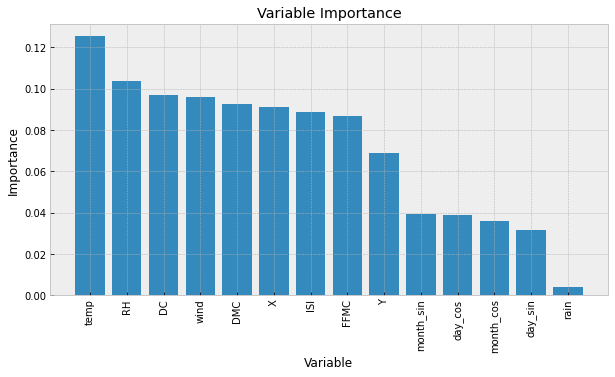

In [ ]:
# Set the style
plt.style.use('bmh')
x_values = list(range(len(feature_importance)))

# bar graph for feature importance
plt.figure(figsize=(10,5))
plt.bar(x_values, importance, orientation = 'vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importance');

In [ ]:
# Predicting from log test data

final_model = rforest_search.best_estimator_
final_pred = final_model.predict(X_testlo)
final_mse = mean_squared_error(y_testlo, final_pred)
final_rmse = np.sqrt(final_mse)
final_mae = metrics.mean_absolute_error(y_testlo, final_pred)
print('The final RMSE on the test set is', round(final_rmse, 2))
print('The final MAE on the test set is', round(final_mse, 2))

The final RMSE on the test set is 1.35
The final MAE on the test set is 1.82


In [ ]:
# KNN Classification
#import classification report library
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_trainc, y_trainc)
knn_predi = knn.predict(X_testc)


print(classification_report(y_testc,knn_predi))


              precision    recall  f1-score   support

           0       0.75      1.00      0.85       114
           1       0.67      0.13      0.22        15
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6

    accuracy                           0.74       156
   macro avg       0.28      0.23      0.22       156
weighted avg       0.61      0.74      0.65       156



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_trainc, y_trainc)
forest_predi = forest.predict(X_testc)
print(classification_report(y_testc,forest_predi))


              precision    recall  f1-score   support

           0       0.76      0.96      0.84       114
           1       0.11      0.07      0.08        15
           2       0.00      0.00      0.00        16
           3       1.00      0.20      0.33         5
           4       0.00      0.00      0.00         6

    accuracy                           0.71       156
   macro avg       0.37      0.24      0.25       156
weighted avg       0.60      0.71      0.64       156



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=0, n=366 (20.000%)
Class=2, n=366 (20.000%)
Class=1, n=366 (20.000%)
Class=3, n=366 (20.000%)
Class=4, n=366 (20.000%)


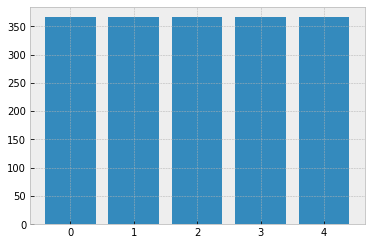

In [ ]:
# Oversampling to balance the classes of the outcome variable
# Example of oversampling a multi-class classification dataset
# import libraries for oversampling
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

oversample = SMOTE()
X_os, y_os = oversample.fit_resample(X,y)
counter = Counter(y_os)
for k,v in counter.items():
	per = v / len(y_os) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#  nested cross-validation for random forest 
# import libraries for cross-validation and gridsearchcv
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# configure the cross-validation 
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
outer_results = list()
for train_ix, test_ix in cv_outer.split(X_os):
	# split data
	X_train, X_test = X_os[train_ix, :], X_os[test_ix, :]
	y_train, y_test = y_os[train_ix], y_os[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# random forest model
	model = RandomForestClassifier(random_state=1)
	# define parameters for tuning
	space = dict()
	space['n_estimators'] = [10, 100, 500]
	space['max_features'] = [2, 4, 6]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	result = search.fit(X_train, y_train)
	# best performing model
	best_model = result.best_estimator_
	# evaluate model 
	yhat = best_model.predict(X_test)
	# accuracy score 
	acc = accuracy_score(y_test, yhat)
	# store the result
	outer_results.append(acc)
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=0.945, est=0.858, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.913, est=0.868, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.913, est=0.876, cfg={'max_features': 4, 'n_estimators': 500}
>acc=0.929, est=0.877, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.907, est=0.871, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.896, est=0.875, cfg={'max_features': 4, 'n_estimators': 100}
>acc=0.880, est=0.874, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.880, est=0.881, cfg={'max_features': 2, 'n_estimators': 500}
>acc=0.934, est=0.881, cfg={'max_features': 4, 'n_estimators': 100}
>acc=0.885, est=0.884, cfg={'max_features': 2, 'n_estimators': 500}
Accuracy: 0.908 (0.022)


In [ ]:
#print classication report for random forest model(oversampling)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        34
           1       0.79      0.94      0.86        32
           2       0.94      0.77      0.85        39
           3       0.95      1.00      0.97        37
           4       0.95      0.98      0.96        41

    accuracy                           0.89       183
   macro avg       0.88      0.88      0.88       183
weighted avg       0.89      0.89      0.88       183



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

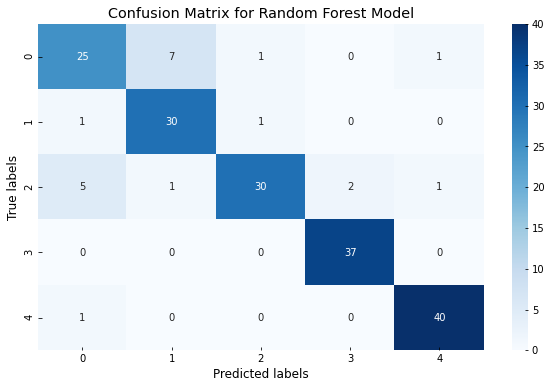

In [ ]:
#confusion matrix for random
f, ax = plt.subplots(figsize=(10, 6))

confusion_mx = confusion_matrix(y_test, yhat)
ax= plt.subplot()
sns.heatmap(confusion_mx, annot=True, ax = ax, cmap= 'Blues');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
plt.title('Confusion Matrix for Random Forest Model')

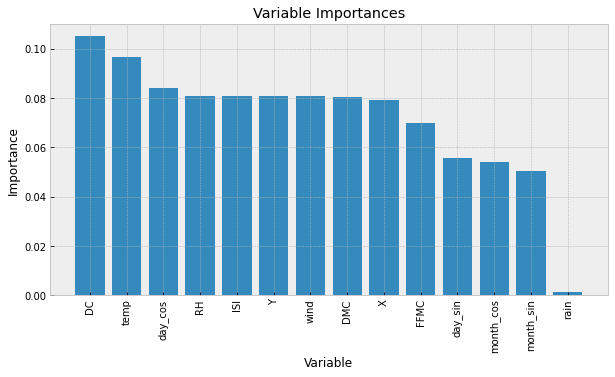

In [ ]:
#features importance plot from random forest classification (oversampling)
importances = result.best_estimator_.feature_importances_
feature_list = list(X.columns)

feature_importance= sorted(zip(importances, feature_list), reverse=True)
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

plt.style.use('bmh')
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(10,5))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


In [ ]:
# Running KFold Cross validation again with KNN
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# parameters for knn
pr = dict()
pr['n_neighbors'] = list(range(1,30))
pr['weights'] = ['uniform','distance']
param_grid = [{'n_neighbors': list(range(1,30)),
             'weights': ['uniform','distance']}]
# enumerate splits
outer_results = list()
for train_ix, test_ix in cv_outer.split(X_os):
	X_train, X_test = X_os[train_ix, :], X_os[test_ix, :]
	y_train, y_test = y_os[train_ix], y_os[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# knn model
	knn = KNeighborsClassifier()
  
	search = GridSearchCV(knn, pr, scoring='accuracy', cv=cv_inner, refit=True)
	result = search.fit(X_train, y_train)
	best_model = result.best_estimator_
	yhat = best_model.predict(X_test)
	acc = accuracy_score(y_test, yhat)
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))


>acc=0.765, est=0.745, cfg={'n_neighbors': 2, 'weights': 'distance'}
>acc=0.814, est=0.758, cfg={'n_neighbors': 1, 'weights': 'uniform'}
>acc=0.842, est=0.749, cfg={'n_neighbors': 2, 'weights': 'distance'}
>acc=0.809, est=0.758, cfg={'n_neighbors': 2, 'weights': 'distance'}
>acc=0.831, est=0.774, cfg={'n_neighbors': 2, 'weights': 'distance'}
>acc=0.842, est=0.769, cfg={'n_neighbors': 2, 'weights': 'distance'}
>acc=0.776, est=0.762, cfg={'n_neighbors': 1, 'weights': 'uniform'}
>acc=0.781, est=0.765, cfg={'n_neighbors': 2, 'weights': 'distance'}
>acc=0.852, est=0.751, cfg={'n_neighbors': 1, 'weights': 'uniform'}
>acc=0.787, est=0.761, cfg={'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.810 (0.030)


In [ ]:
# Printing classification report for knn model (oversampling)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59        34
           1       0.66      0.78      0.71        32
           2       0.74      0.74      0.74        39
           3       0.90      0.97      0.94        37
           4       0.83      0.93      0.87        41

    accuracy                           0.79       183
   macro avg       0.79      0.78      0.77       183
weighted avg       0.79      0.79      0.78       183



Text(0.5, 1.0, 'Confusion Matrix for K-NN Model')

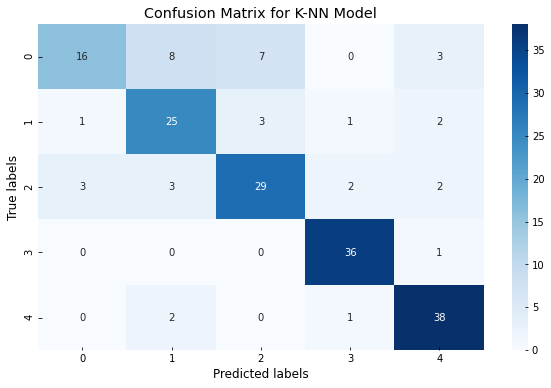

In [ ]:
#Confusion matrix for knn model
f, ax = plt.subplots(figsize=(10, 6))
confusion_mx = confusion_matrix(y_test, yhat)
ax= plt.subplot()
sns.heatmap(confusion_mx, annot=True, ax = ax, cmap= 'Blues');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
plt.title("Confusion Matrix for K-NN Model")